[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mbarbetti/LNHunter/blob/master/4_multiclass_classification.ipynb)

# Multiclass classification

## Data loading and preparation

In [1]:
import numpy as np
import pandas as pd

import os
import pickle

data_dir  = "./data"
data_file = "db_mediastinalbulky_v2-reduced.pkl" 
file_path = os.path.join ( data_dir, data_file )

with open (file_path, "rb") as file:
  data = pickle.load (file)

data . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               119 non-null    float64
 1   lymphoma_type                    119 non-null    float64
 2   age                              111 non-null    float64
 3   SUVmin (SUV)                     111 non-null    float64
 4   SUVmean (SUV)                    111 non-null    float64
 5   MTV (# vx)                       111 non-null    float64
 6   SMTV (mL/Kg) TOT                 111 non-null    float64
 7   CONVENTIONAL_SUVbwmin            115 non-null    float64
 8   CONVENTIONAL_SUVbwKurtosis       115 non-null    float64
 9   DISCRETIZED_HISTO_Kurtosis       110 non-null    float64
 10  SHAPE_Sphericity[onlyFor3DROI])  113 non-null    float64
 11  GLCM_Correlation                 113 non-null    float64
 12  GLRLM_SRE             

### Aggressive data cleaning 

In [2]:
data . dropna ( inplace = True )
data . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 118
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               101 non-null    float64
 1   lymphoma_type                    101 non-null    float64
 2   age                              101 non-null    float64
 3   SUVmin (SUV)                     101 non-null    float64
 4   SUVmean (SUV)                    101 non-null    float64
 5   MTV (# vx)                       101 non-null    float64
 6   SMTV (mL/Kg) TOT                 101 non-null    float64
 7   CONVENTIONAL_SUVbwmin            101 non-null    float64
 8   CONVENTIONAL_SUVbwKurtosis       101 non-null    float64
 9   DISCRETIZED_HISTO_Kurtosis       101 non-null    float64
 10  SHAPE_Sphericity[onlyFor3DROI])  101 non-null    float64
 11  GLCM_Correlation                 101 non-null    float64
 12  GLRLM_SRE             

### Splitting into train-set and test-set

In [3]:
cols = list ( data.columns )
X_cols = cols[2:]
y_cols = "lymphoma_type"

X = data[X_cols] . to_numpy()
y = data[y_cols] . to_numpy() . flatten()

ratio_gz = len(y[y == 2]) / len(y[y == 1])
print ( "GZ-HL  ratio on data-set : {:.1f}%" . format (100 * ratio_gz) )

ratio_pml = len(y[y == 3]) / len(y[y == 1])
print ( "PML-HL ratio on data-set : {:.1f}%" . format (100 * ratio_pml) )

GZ-HL  ratio on data-set : 13.8%
PML-HL ratio on data-set : 41.5%


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 42 )

### Train-set

ratio_gz_train = len(y_train[y_train == 2]) / len(y_train[y_train == 1])
print ( "GZ-HL  ratio on train-set : {:.1f}%" . format (100 * ratio_gz_train) )

ratio_pml_train = len(y_train[y_train == 3]) / len(y_train[y_train == 1])
print ( "PML-HL ratio on train-set : {:.1f}%" . format (100 * ratio_pml_train) )

### Test-set

ratio_gz_test = len(y_test[y_test == 2]) / len(y_test[y_test == 1])
print ( "GZ-HL  ratio on test-set  : {:.1f}%" . format (100 * ratio_gz_test) )

ratio_pml_test = len(y_test[y_test == 3]) / len(y_test[y_test == 1])
print ( "PML-HL ratio on test-set  : {:.1f}%" . format (100 * ratio_pml_test) )

GZ-HL  ratio on train-set : 13.5%
PML-HL ratio on train-set : 40.4%
GZ-HL  ratio on test-set  : 15.4%
PML-HL ratio on test-set  : 46.2%


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit ( n_splits = 1, test_size = 0.2, random_state = 42 )
for idx_train, idx_test in sss . split ( X, y ):
  X_train , y_train = X[idx_train] , y[idx_train]
  X_test  , y_test  = X[idx_test]  , y[idx_test]

### Train-set

ratio_gz_train = len(y_train[y_train == 2]) / len(y_train[y_train == 1])
print ( "GZ-HL  ratio on train-set : {:.1f}%" . format (100 * ratio_gz_train) )

ratio_pml_train = len(y_train[y_train == 3]) / len(y_train[y_train == 1])
print ( "PML-HL ratio on train-set : {:.1f}%" . format (100 * ratio_pml_train) )

### Test-set

ratio_gz_test = len(y_test[y_test == 2]) / len(y_test[y_test == 1])
print ( "GZ-HL  ratio on test-set  : {:.1f}%" . format (100 * ratio_gz_test) )

ratio_pml_test = len(y_test[y_test == 3]) / len(y_test[y_test == 1])
print ( "PML-HL ratio on test-set  : {:.1f}%" . format (100 * ratio_pml_test) )

GZ-HL  ratio on train-set : 13.5%
PML-HL ratio on train-set : 40.4%
GZ-HL  ratio on test-set  : 15.4%
PML-HL ratio on test-set  : 46.2%


### Data preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

#scaler = MinMaxScaler()
scaler = StandardScaler()
#scaler = QuantileTransformer (n_quantiles = 50, output_distribution = "normal")

X_train = scaler . fit_transform ( X_train )
X_test  = scaler . transform ( X_test )

np.mean ( X_train, axis = 0 )

array([ 2.30371278e-16, -4.73232564e-16, -6.71684930e-16,  5.55111512e-18,
        9.36750677e-17, -3.46250806e-16,  2.22738494e-16, -1.44328993e-16,
       -1.70696790e-16,  1.13312137e-15, -3.33066907e-17,  0.00000000e+00,
        1.23095978e-15, -1.17961196e-17, -9.71445147e-18, -1.95676808e-16,
       -6.66133815e-17])

## Dummy Classifier

In [7]:
from utils import DummyClassifier, display_score
from sklearn.model_selection import cross_val_score

clf_dummy = DummyClassifier()

accuracy = cross_val_score ( clf_dummy, X_train, y_train, scoring = "accuracy", cv = 3 )
display_score ( scores = accuracy, score_name = "accuracy", model_name = "Dummy Classifier" )

+--------------------+
|  Dummy Classifier  |
+--------------------+
| accuracy : [0.59259259 0.40740741 0.46153846]
| mean : 48.7%
| std  : 7.8%
+--- - -


+---->  Label HL   <----+
|   Precision : 61.4%   |
|   Recall    : 51.9%   |
+---->  Label GZ   <----+
|   Precision : 0.0%   |
|   Recall    : 0.0%   |
+---->  Label PML  <----+
|   Precision : 28.6%   |
|   Recall    : 38.1%   |
+-----------------------+


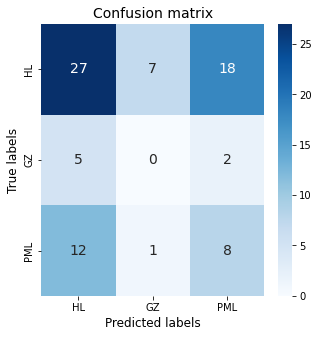

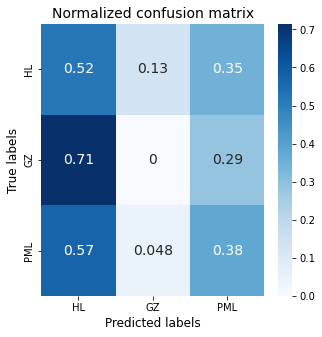

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict ( clf_dummy, X_train, y_train, cv = 3 )

from utils import precision_recall_scores
_ = precision_recall_scores ( y_train, y_train_pred, verbose = True, labels = ["HL", "GZ", "PML"], show_conf_matrix = True )

## Logistic Regression

+-----------------------+
|  Logistic Regression  |
+-----------------------+
| accuracy : [0.66666667 0.62962963 0.76923077]
| mean : 68.9%
| std  : 5.9%
+--- - -
+---->  Label HL   <----+
|   Precision : 85.1%   |
|   Recall    : 76.9%   |
+---->  Label GZ   <----+
|   Precision : 10.0%   |
|   Recall    : 14.3%   |
+---->  Label PML  <----+
|   Precision : 60.9%   |
|   Recall    : 66.7%   |
+-----------------------+


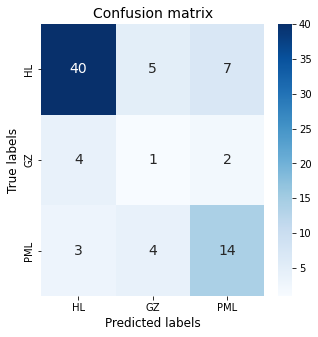

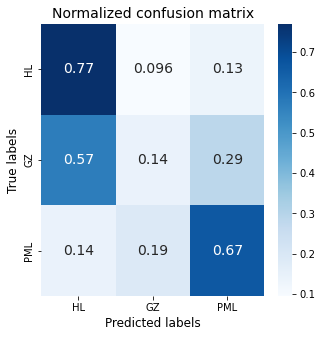

In [9]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression ( 
                                    penalty = "l2" ,
                                    class_weight = "balanced" ,
                                    solver = "lbfgs" ,
                                    max_iter = 500 ,
                                    multi_class = "multinomial" ,
                                  )

accuracy = cross_val_score ( clf_logistic, X_train, y_train, scoring = "accuracy", cv = 3 )
y_train_pred = cross_val_predict ( clf_logistic, X_train, y_train, cv = 3 )

display_score ( scores = accuracy, score_name = "accuracy", model_name = "Logistic Regression" )
_ = precision_recall_scores ( y_train, y_train_pred, verbose = True, labels = ["HL", "GZ", "PML"], show_conf_matrix = True )

### Features ranking

In [10]:
from sklearn.feature_selection import RFECV

selector = RFECV ( clf_logistic, step = 1, cv = 3 )
selector . fit ( X_train, y_train )

RFECV(cv=3,
      estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                   multi_class='multinomial'))

In [11]:
ranks = selector . ranking_
rank1_feats = np.nonzero ( ranks == 1 ) [0]
rank2_feats = np.nonzero ( ranks == 2 ) [0]
rank3_feats = np.nonzero ( ranks == 3 ) [0]
high_ranked_feats = np.concatenate ( [rank1_feats, rank2_feats, rank3_feats] )

print ( "+-------------------+" )
print ( "|  Ranked Features  |" )
print ( "+-------------------+" )
for rnk, feat in zip (ranks, X_cols):
  print ( "| Rank-{:02} : {}" . format (rnk, feat) )
print ( "+--- - -" )

X_train_hrf = X_train [:,high_ranked_feats]
X_test_hrf  = X_test  [:,high_ranked_feats]

+-------------------+
|  Ranked Features  |
+-------------------+
| Rank-09 : age
| Rank-04 : SUVmin (SUV)
| Rank-01 : SUVmean (SUV)
| Rank-01 : MTV (# vx)
| Rank-12 : SMTV (mL/Kg) TOT
| Rank-08 : CONVENTIONAL_SUVbwmin
| Rank-06 : CONVENTIONAL_SUVbwKurtosis
| Rank-03 : DISCRETIZED_HISTO_Kurtosis
| Rank-02 : SHAPE_Sphericity[onlyFor3DROI])
| Rank-05 : GLCM_Correlation
| Rank-01 : GLRLM_SRE
| Rank-01 : NGLDM_Coarseness
| Rank-01 : NGLDM_Busyness
| Rank-11 : GLZLM_LZE
| Rank-10 : GLZLM_LZLGE
| Rank-07 : GLZLM_LZHGE
| Rank-01 : GLZLM_ZLNU
+--- - -


## Random Forest

+----------------------------+
|  Random Forest Classifier  |
+----------------------------+
| accuracy : [0.7037037  0.7037037  0.80769231]
| mean : 73.8%
| std  : 4.9%
+--- - -
+---->  Label HL   <----+
|   Precision : 81.0%   |
|   Recall    : 90.4%   |
+---->  Label GZ   <----+
|   Precision : 0.0%   |
|   Recall    : 0.0%   |
+---->  Label PML  <----+
|   Precision : 75.0%   |
|   Recall    : 71.4%   |
+-----------------------+


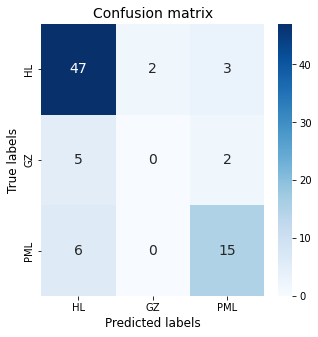

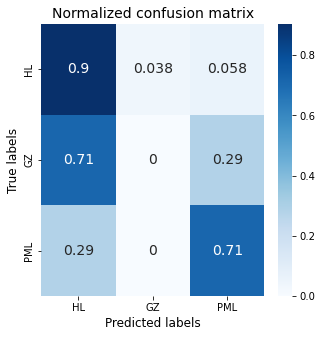

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier (
                                      n_estimators = 100 ,
                                      criterion = "gini" ,
                                      max_features = "sqrt" ,
                                      max_leaf_nodes = 10 ,
                                      max_depth = 5 ,
                                      class_weight = "balanced" ,
                                    )

accuracy = cross_val_score ( clf_forest, X_train_hrf, y_train, scoring = "accuracy", cv = 3 )
y_train_pred = cross_val_predict ( clf_forest, X_train_hrf, y_train, cv = 3 )

display_score ( scores = accuracy, score_name = "accuracy", model_name = "Random Forest Classifier" )
_ = precision_recall_scores ( y_train, y_train_pred, verbose = True, labels = ["HL", "GZ", "PML"], show_conf_matrix = True )

## Gradient Boosted Decision Trees

+-------------------+
|  GBDT Classifier  |
+-------------------+
| accuracy : [0.66666667 0.66666667 0.76923077]
| mean : 70.1%
| std  : 4.8%
+--- - -
+---->  Label HL   <----+
|   Precision : 75.9%   |
|   Recall    : 78.8%   |
+---->  Label GZ   <----+
|   Precision : 0.0%   |
|   Recall    : 0.0%   |
+---->  Label PML  <----+
|   Precision : 55.0%   |
|   Recall    : 52.4%   |
+-----------------------+


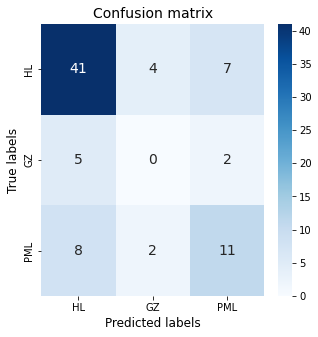

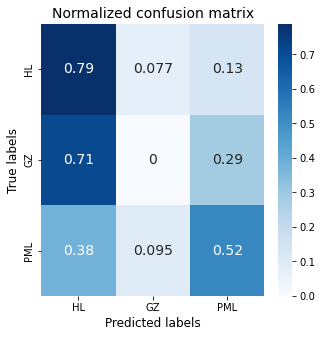

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbdt = GradientBoostingClassifier (
                                        loss = "deviance" ,
                                        learning_rate = 0.3 ,
                                        n_estimators  = 100 ,
                                        criterion = "friedman_mse" ,
                                        max_features  = None , 
                                        max_leaf_nodes = 10 ,
                                        max_depth = 5       ,
                                      )

accuracy = cross_val_score ( clf_gbdt, X_train_hrf, y_train, scoring = "accuracy", cv = 3 )
y_train_pred = cross_val_predict ( clf_gbdt, X_train, y_train, cv = 3 )

display_score ( scores = accuracy, score_name = "accuracy", model_name = "GBDT Classifier" )
_ = precision_recall_scores ( y_train, y_train_pred, verbose = True, labels = ["HL", "GZ", "PML"], show_conf_matrix = True )

## Models combination

+----------------------+
|  Models combination  |
+----------------------+
| accuracy : [0.74074074 0.7037037  0.80769231]
| mean : 75.1%
| std  : 4.3%
+--- - -
+---->  Label HL   <----+
|   Precision : 79.3%   |
|   Recall    : 88.5%   |
+---->  Label GZ   <----+
|   Precision : 0.0%   |
|   Recall    : 0.0%   |
+---->  Label PML  <----+
|   Precision : 68.4%   |
|   Recall    : 61.9%   |
+-----------------------+


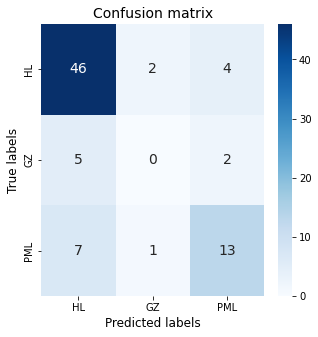

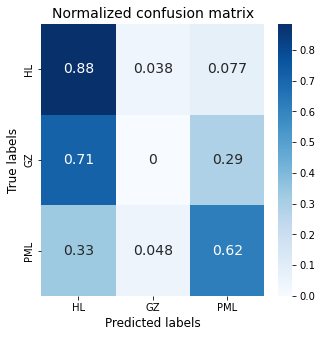

In [14]:
from sklearn.ensemble import VotingClassifier

clf_ens = VotingClassifier (
                             estimators = [ ("logistic", clf_logistic), ("forest", clf_forest), ("GBDT", clf_gbdt) ],
                             voting = "hard"
                           )

accuracy = cross_val_score ( clf_ens, X_train_hrf, y_train, scoring = "accuracy", cv = 3 )
y_train_pred = cross_val_predict ( clf_ens, X_train_hrf, y_train, cv = 3 )

display_score ( scores = accuracy, score_name = "accuracy", model_name = "Models combination" )
_ = precision_recall_scores ( y_train, y_train_pred, verbose = True, labels = ["HL", "GZ", "PML"], show_conf_matrix = True )

## Model evaluation

+---->  Label HL   <----+
|   Precision : 75.0%   |
|   Recall    : 92.3%   |
+---->  Label GZ   <----+
|   Precision : nan%   |
|   Recall    : 0.0%   |
+---->  Label PML  <----+
|   Precision : 60.0%   |
|   Recall    : 50.0%   |
+-----------------------+


/BIG/LOCAL/home/barbetti/lymphoma-classification/utils/precision_recall_scores.py:27: RuntimeWarning: invalid value encountered in long_scalars
  precision[i] = conf_matrix[i,i] / np.sum ( conf_matrix[:,i] )


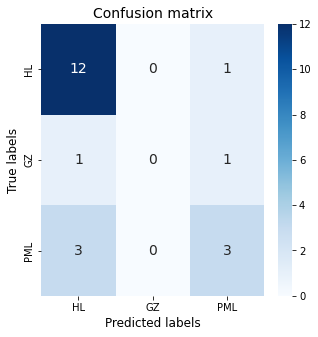

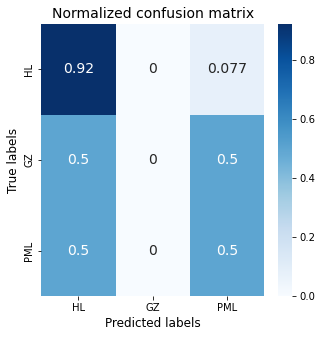

In [15]:
model = clf_ens . fit ( X_train_hrf, y_train )

y_test_pred = model . predict ( X_test_hrf )

_ = precision_recall_scores ( y_test, y_test_pred, verbose = True, labels = ["HL", "GZ", "PML"], show_conf_matrix = True )

## Model export

In [16]:
model_dir = "./models"
exp_model_file = "multiclass_classifier_v1.pkl"
exp_model_path = os.path.join ( model_dir, exp_model_file )

pickle . dump ( model, open ( exp_model_path, "wb" ) )